In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import the functions for visualizing the decision tree
import pydotplus
from IPython.display import Image  

In [2]:
df1 = pd.read_csv('~/Downloads/customer.csv')
df1

,Cust_Number,Yearly_Income,Age,Cust_Spend_Score,Sex
0,CUSTID1,15000,18,44,0
1,CUSTID2,15000,18,79,0
2,CUSTID3,16000,23,8,1
3,CUSTID4,16000,25,79,1
4,CUSTID5,17000,32,41,1
5,CUSTID6,17000,25,81,1
6,CUSTID7,18000,34,8,1
7,CUSTID8,18000,26,98,1
8,CUSTID9,19000,66,1,0
9,CUSTID10,19000,33,70,1


In [3]:
df1['Cust_Number'].unique

<bound method Series.unique of 0        CUSTID1
1        CUSTID2
2        CUSTID3
3        CUSTID4
4        CUSTID5
5        CUSTID6
6        CUSTID7
7        CUSTID8
8        CUSTID9
9       CUSTID10
10      CUSTID11
11      CUSTID12
12      CUSTID13
13      CUSTID14
14      CUSTID15
15      CUSTID16
16      CUSTID17
17      CUSTID18
18      CUSTID19
19      CUSTID20
20      CUSTID21
21      CUSTID22
22      CUSTID23
23      CUSTID24
24      CUSTID25
25      CUSTID26
26      CUSTID27
27      CUSTID28
28      CUSTID29
29      CUSTID30
30      CUSTID31
31      CUSTID32
32      CUSTID33
33      CUSTID34
34      CUSTID35
35      CUSTID36
36      CUSTID37
37      CUSTID38
38      CUSTID39
39      CUSTID40
40      CUSTID41
41      CUSTID42
42      CUSTID43
43      CUSTID44
44      CUSTID45
45      CUSTID46
46      CUSTID47
47      CUSTID48
48      CUSTID49
49      CUSTID50
50      CUSTID51
51      CUSTID52
52      CUSTID53
53      CUSTID54
54      CUSTID55
55      CUSTID56
56      CUSTID57


In [4]:
df = df1.drop('Cust_Number',axis = 1)

In [5]:
df


,Yearly_Income,Age,Cust_Spend_Score,Sex
0,15000,18,44,0
1,15000,18,79,0
2,16000,23,8,1
3,16000,25,79,1
4,17000,32,41,1
5,17000,25,81,1
6,18000,34,8,1
7,18000,26,98,1
8,19000,66,1,0
9,19000,33,70,1


In [7]:
#visulize and inspect outlier treatment
num = df.select_dtypes(np.number)

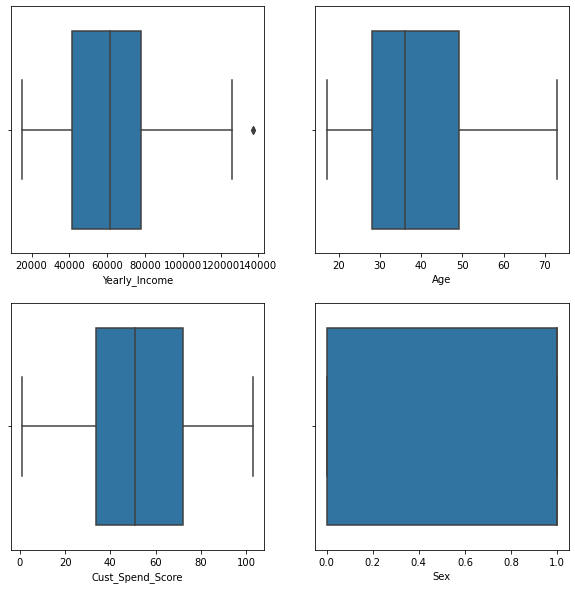

In [14]:
fig,axes = plt.subplots(nrows=1, ncols=3,figsize  = (10,10))
c = 1
for i in num:
    plt.subplot(2,2,c)
    sns.boxplot(df[i])
    c+=1
plt.show()

In [18]:
df.skew()

Yearly_Income       0.321843
Age                 0.552370
Cust_Spend_Score   -0.015886
Sex                -0.243578
dtype: float64

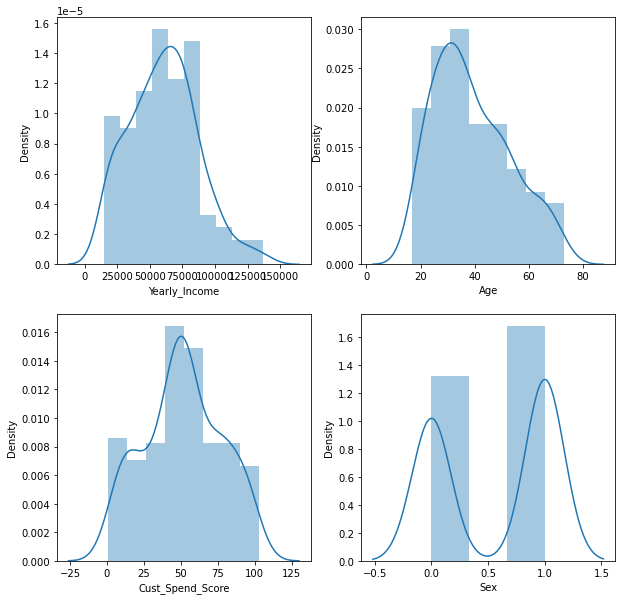

In [19]:
fig,axes = plt.subplots(nrows=1, ncols=3,figsize  = (10,10))
c = 1
for i in num:
    plt.subplot(2,2,c)
    sns.distplot(df[i])
    c+=1
plt.show()

In [22]:
def find_(var):
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3-q1
    low = q1 - 1.5*iqr
    upp = q3 + 1.5*iqr
    return low,upp




In [23]:
lower,upper = find_('Age')

In [25]:
lower,upper

(-3.875, 81.125)

In [29]:
lower1,upper1 = find_('Yearly_Income')
lower1,upper1

(-13250.0, 132750.0)

In [30]:
lower2,upper2 = find_('Cust_Spend_Score')
lower2,upper2

(-23.625, 129.375)

In [31]:
from sklearn.cluster import KMeans

In [32]:
kmod = KMeans()

In [33]:
scale = StandardScaler()

In [34]:
scaled = scale.fit_transform(df)

In [39]:
df_scaled = pd.DataFrame(scaled,columns= df.columns)

In [40]:
df_scaled

,Yearly_Income,Age,Cust_Spend_Score,Sex
0,-1.738999,-1.501068,-0.284181,-1.128152
1,-1.738999,-1.501068,1.063563,-1.128152
2,-1.700830,-1.145280,-1.670433,0.886405
3,-1.700830,-1.002965,1.063563,0.886405
4,-1.662660,-0.504863,-0.399702,0.886405
5,-1.662660,-1.002965,1.140577,0.886405
6,-1.624491,-0.362548,-1.670433,0.886405
7,-1.624491,-0.931808,1.795195,0.886405
8,-1.586321,1.914493,-1.939981,-1.128152
9,-1.586321,-0.433705,0.717000,0.886405


In [44]:
model = kmod.fit(df_scaled)

In [45]:
model

KMeans()

In [48]:
model.labels_

array([4, 4, 1, 1, 1, 1, 0, 1, 2, 1, 2, 1, 0, 1, 4, 4, 1, 4, 2, 1, 4, 4,
       0, 4, 0, 4, 0, 4, 0, 1, 2, 1, 2, 4, 0, 1, 0, 1, 0, 1, 0, 4, 2, 1,
       0, 1, 0, 1, 1, 1, 0, 4, 1, 2, 0, 2, 0, 2, 1, 2, 2, 4, 0, 0, 2, 4,
       0, 0, 4, 1, 2, 0, 0, 0, 2, 4, 0, 4, 1, 0, 2, 4, 2, 0, 1, 2, 0, 1,
       1, 0, 0, 4, 2, 0, 1, 4, 0, 1, 2, 4, 1, 0, 2, 4, 2, 1, 0, 2, 2, 2,
       2, 1, 0, 4, 1, 1, 0, 0, 0, 0, 4, 6, 7, 5, 1, 7, 3, 5, 2, 5, 3, 5,
       6, 7, 3, 7, 6, 5, 3, 7, 6, 5, 1, 7, 3, 5, 3, 7, 6, 5, 3, 5, 6, 7,
       6, 7, 3, 7, 3, 7, 6, 7, 3, 7, 3, 7, 3, 7, 6, 5, 3, 5, 3, 5, 6, 7,
       3, 5, 3, 5, 6, 7, 3, 7, 6, 5, 6, 5, 6, 7, 6, 7, 3, 7, 6, 7, 6, 5,
       3, 5])

In [85]:
from sklearn.metrics import silhouette_score

In [86]:
silhouette_score(df_scaled,model.labels_)

0.38772536426327114

In [123]:
mode1 = KMeans(n_clusters = 5).fit(df_scaled)

In [53]:
mode1

KMeans(n_clusters=16, random_state=10)

In [117]:
silhouette_score(df_scaled,mode1.labels_)

0.29753775422875567

In [107]:
wcss = []
# model1 = []

for i in range(1,16):
    kmodel = KMeans(n_clusters=i)
    mod = kmodel.fit(df_scaled)
    wcss.append(kmodel.inertia_)
    # model1.append(silhouette_score(df_scaled,mod.labels_))

    

In [120]:
model3 = []
for i in range(1,16):
    kmmodel = KMeans(n_clusters=i)
    kmmodel.fit(df_scaled)
    model3.append(silhouette_score(df_scaled,kmmodel.labels_))

model3

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

In [104]:
wcss

([800.0,
  589.0386579945479,
  484.2518177912033,
  386.61264571100253,
  323.4261830225702,
  275.1246337919435,
  236.87550912681417,
  199.4391474337523,
  173.14255266825228,
  150.7682113520494,
  135.67647751095996,
  123.87208381716127,
  115.46017813917285,
  107.55028849022428,
  99.85465966315957],
 [0.41274786328359414])

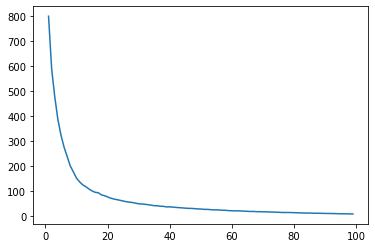

In [97]:
plt.plot(range(1,100),wcss)

ValueError: x and y must have same first dimension, but have shapes (1,) and (99,)

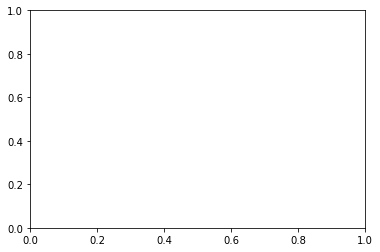

In [98]:
plt.plot(kmodel.fit(df_scaled),wcss)

In [124]:
df_scaled['clusters'] = mode1.labels_

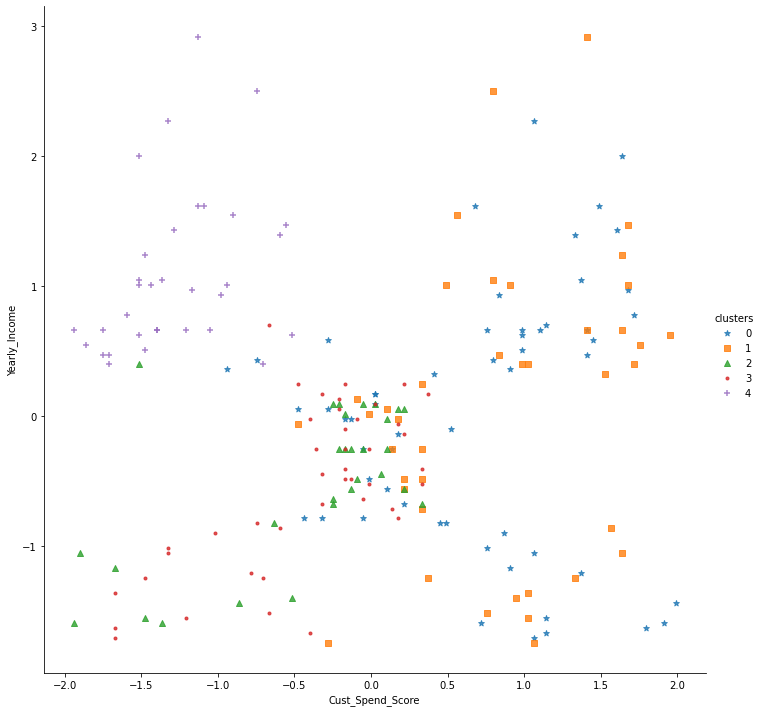

In [125]:
sns.lmplot(x= 'Cust_Spend_Score',y = "Yearly_Income",data = df_scaled,hue = 'clusters',markers=['*',',','^','.','+'],fit_reg=False,size=10)